<a href="https://colab.research.google.com/github/nupursjsu/Deep-Learning/blob/master/Ungraded_Assignment4/PyTorch_Basics_Ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pytorch Basics - Chapter 4

## Parameter optimization

### Importing necessary libraries

In [0]:
import torch
%matplotlib inline
import numpy as np
torch.set_printoptions(edgeitems=2)

In [0]:
#Defining temperature data in Celsius and Unknown units
temp_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
temp_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
temp_c = torch.tensor(temp_c) 
temp_u = torch.tensor(temp_u)

### Building a linear  model

In [0]:
#Defining a model
def my_model(temp_u, w, b):
    return w * temp_u + b

In [0]:
#Defining loss function
def compute_loss(temp_p, temp_c):
  sq_diff = (temp_p - temp_c)**2 
  return sq_diff.mean()

In [86]:
#Initializing the parameters and invoking model
w = torch.ones(1) 
b = torch.zeros(1)

temp_p = my_model(temp_u, w, b) 
temp_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [87]:
#Checking the value of loss
loss = compute_loss(temp_p, temp_c) 
loss

tensor(1763.8846)

In [0]:
#Computing rate of change of loss
gradient = 0.1
rate_of_change_of_loss_w = (compute_loss(my_model(temp_u, w + gradient, b), temp_c) - compute_loss(my_model(temp_u, w - gradient, b), temp_c)) / (2.0 * gradient)

In [0]:
#Updating weights
lr = 1e-2
w = w - lr * rate_of_change_of_loss_w

rate_of_change_of_loss_b = (compute_loss(my_model(temp_u, w + gradient, b), temp_c) - compute_loss(my_model(temp_u, w - gradient, b), temp_c)) / (2.0 * gradient)
b = b - lr * rate_of_change_of_loss_b

In [0]:
#Computing derivative of loss function
def comput_grad_loss(temp_p, temp_c):
  grad_diffs = 2 * (temp_p - temp_c) 
  return grad_diffs

In [0]:
#Defining the model for w and b
def my_dmodel_dw(temp_u, w, b):
    return temp_u

In [0]:
def my_dmodel_db(temp_u, w, b):
    return 1.0

In [0]:
#Defining gradient function by combining all above
def compute_grad(temp_u, temp_c, temp_p, w, b):
    dev_loss_dtp = comput_grad_loss(temp_p, temp_c)
    dev_loss_dw = dev_loss_dtp * my_dmodel_dw(temp_u, w, b)
    dev_loss_db = dev_loss_dtp * my_dmodel_db(temp_u, w, b)
    return torch.stack([dev_loss_dw.sum(), dev_loss_db.sum()])

In [0]:
#Defining the training loop
def train_loop(no_of_epochs, lr, params, temp_u, temp_c):
    for epoch in range(1, no_of_epochs + 1):
        w, b = params

        #Forward pass
        temp_p = my_model(temp_u, w, b)
        loss = compute_loss(temp_p, temp_c)
        #Backward pass
        gradient = compute_grad(temp_u, temp_c, temp_p, w, b)
        params = params - lr * gradient
        print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [0]:
def train_loop(no_of_epochs, lr, params, temp_u, temp_c, print_params=True):
    for epoch in range(1, no_of_epochs + 1):
        w, b = params

        temp_p = my_model(temp_u, w, b)
        loss = compute_loss(temp_p, temp_c)
        gradient = compute_grad(temp_u, temp_c, temp_p, w, b)

        params = params - lr * gradient

        if epoch in {1, 2, 3, 10, 11, 99, 100, 4000, 5000}:  
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', gradient)
        if epoch in {4, 12, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break  
            
    return params

In [96]:
#Running training loop
train_loop(
    no_of_epochs = 100, 
    lr = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    temp_u = temp_u, 
    temp_c = temp_c)

Epoch 1, Loss 1763.884644
    Params: tensor([-495.9026,   -9.0860])
    Grad:   tensor([49690.2617,   908.6000])
Epoch 2, Loss 724343168.000000
    Params: tensor([320594.5938,   5646.5298])
    Grad:   tensor([-32109052.0000,   -565561.5625])
Epoch 3, Loss 302445020315648.000000
    Params: tensor([-2.0716e+08, -3.6491e+06])
    Grad:   tensor([2.0748e+10, 3.6547e+08])
...


tensor([2.3338e+22, 4.1109e+20])

In [97]:
#Running training loop with different learning rates
train_loop(
    no_of_epochs = 100, 
    lr = 1e-4, 
    params = torch.tensor([1.0, 0.0]), 
    temp_u = temp_u, 
    temp_c = temp_c)

Epoch 1, Loss 1763.884644
    Params: tensor([-3.9690, -0.0909])
    Grad:   tensor([49690.2617,   908.6000])
Epoch 2, Loss 51968.496094
    Params: tensor([23.2207,  0.3848])
    Grad:   tensor([-271897.1562,   -4756.1011])
Epoch 3, Loss 1555104.500000
    Params: tensor([-125.5546,   -2.2392])
    Grad:   tensor([1487753.0000,   26239.7617])
...
Epoch 10, Loss 33537752494505984.000000
    Params: tensor([18472554.0000,   325390.0625])
    Grad:   tensor([-2.1849e+11, -3.8486e+09])
Epoch 11, Loss 1004126863762653184.000000
    Params: tensor([-1.0108e+08, -1.7805e+06])
    Grad:   tensor([1.1955e+12, 2.1058e+10])
...


tensor([-2.1799e+18, -3.8398e+16])

In [0]:
#Normalizing temp_u
temp_un = 0.1 * temp_u

In [99]:
#Running training loop on Normalized temp_u
train_loop(
    no_of_epochs = 100, 
    lr = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    temp_u = temp_un, 
    temp_c = temp_c)

Epoch 1, Loss 80.364342
    Params: tensor([9.5375, 1.1704])
    Grad:   tensor([-853.7543, -117.0400])
Epoch 2, Loss 1653.706177
    Params: tensor([-38.4945,  -7.6461])
    Grad:   tensor([4803.2070,  881.6473])
Epoch 3, Loss 52285.097656
    Params: tensor([234.2764,  40.2144])
    Grad:   tensor([-27277.0957,  -4786.0503])
...
Epoch 10, Loss 1859757480607744.000000
    Params: tensor([-43735484.0000,  -7726001.5000])
    Grad:   tensor([5.1448e+09, 9.0884e+08])
Epoch 11, Loss 59811727448997888.000000
    Params: tensor([2.4803e+08, 4.3815e+07])
    Grad:   tensor([-2.9176e+10, -5.1541e+09])
...


tensor([8.8269e+18, 1.5593e+18])

In [100]:
#Changing the no od iteration to 5000
params = training_loop(
    no_of_epochs = 100, 
    lr = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    temp_u = temp_un, 
    temp_c = temp_c,
    print_params = False)

params


Epoch 1, Loss 80.364342
Epoch 2, Loss 80.452637
Epoch 3, Loss 80.541008
...
Epoch 10, Loss 81.161919
Epoch 11, Loss 81.250946
...
Epoch 99, Loss 89.404671
Epoch 100, Loss 89.500961


tensor([ 0.9000, -0.1000])

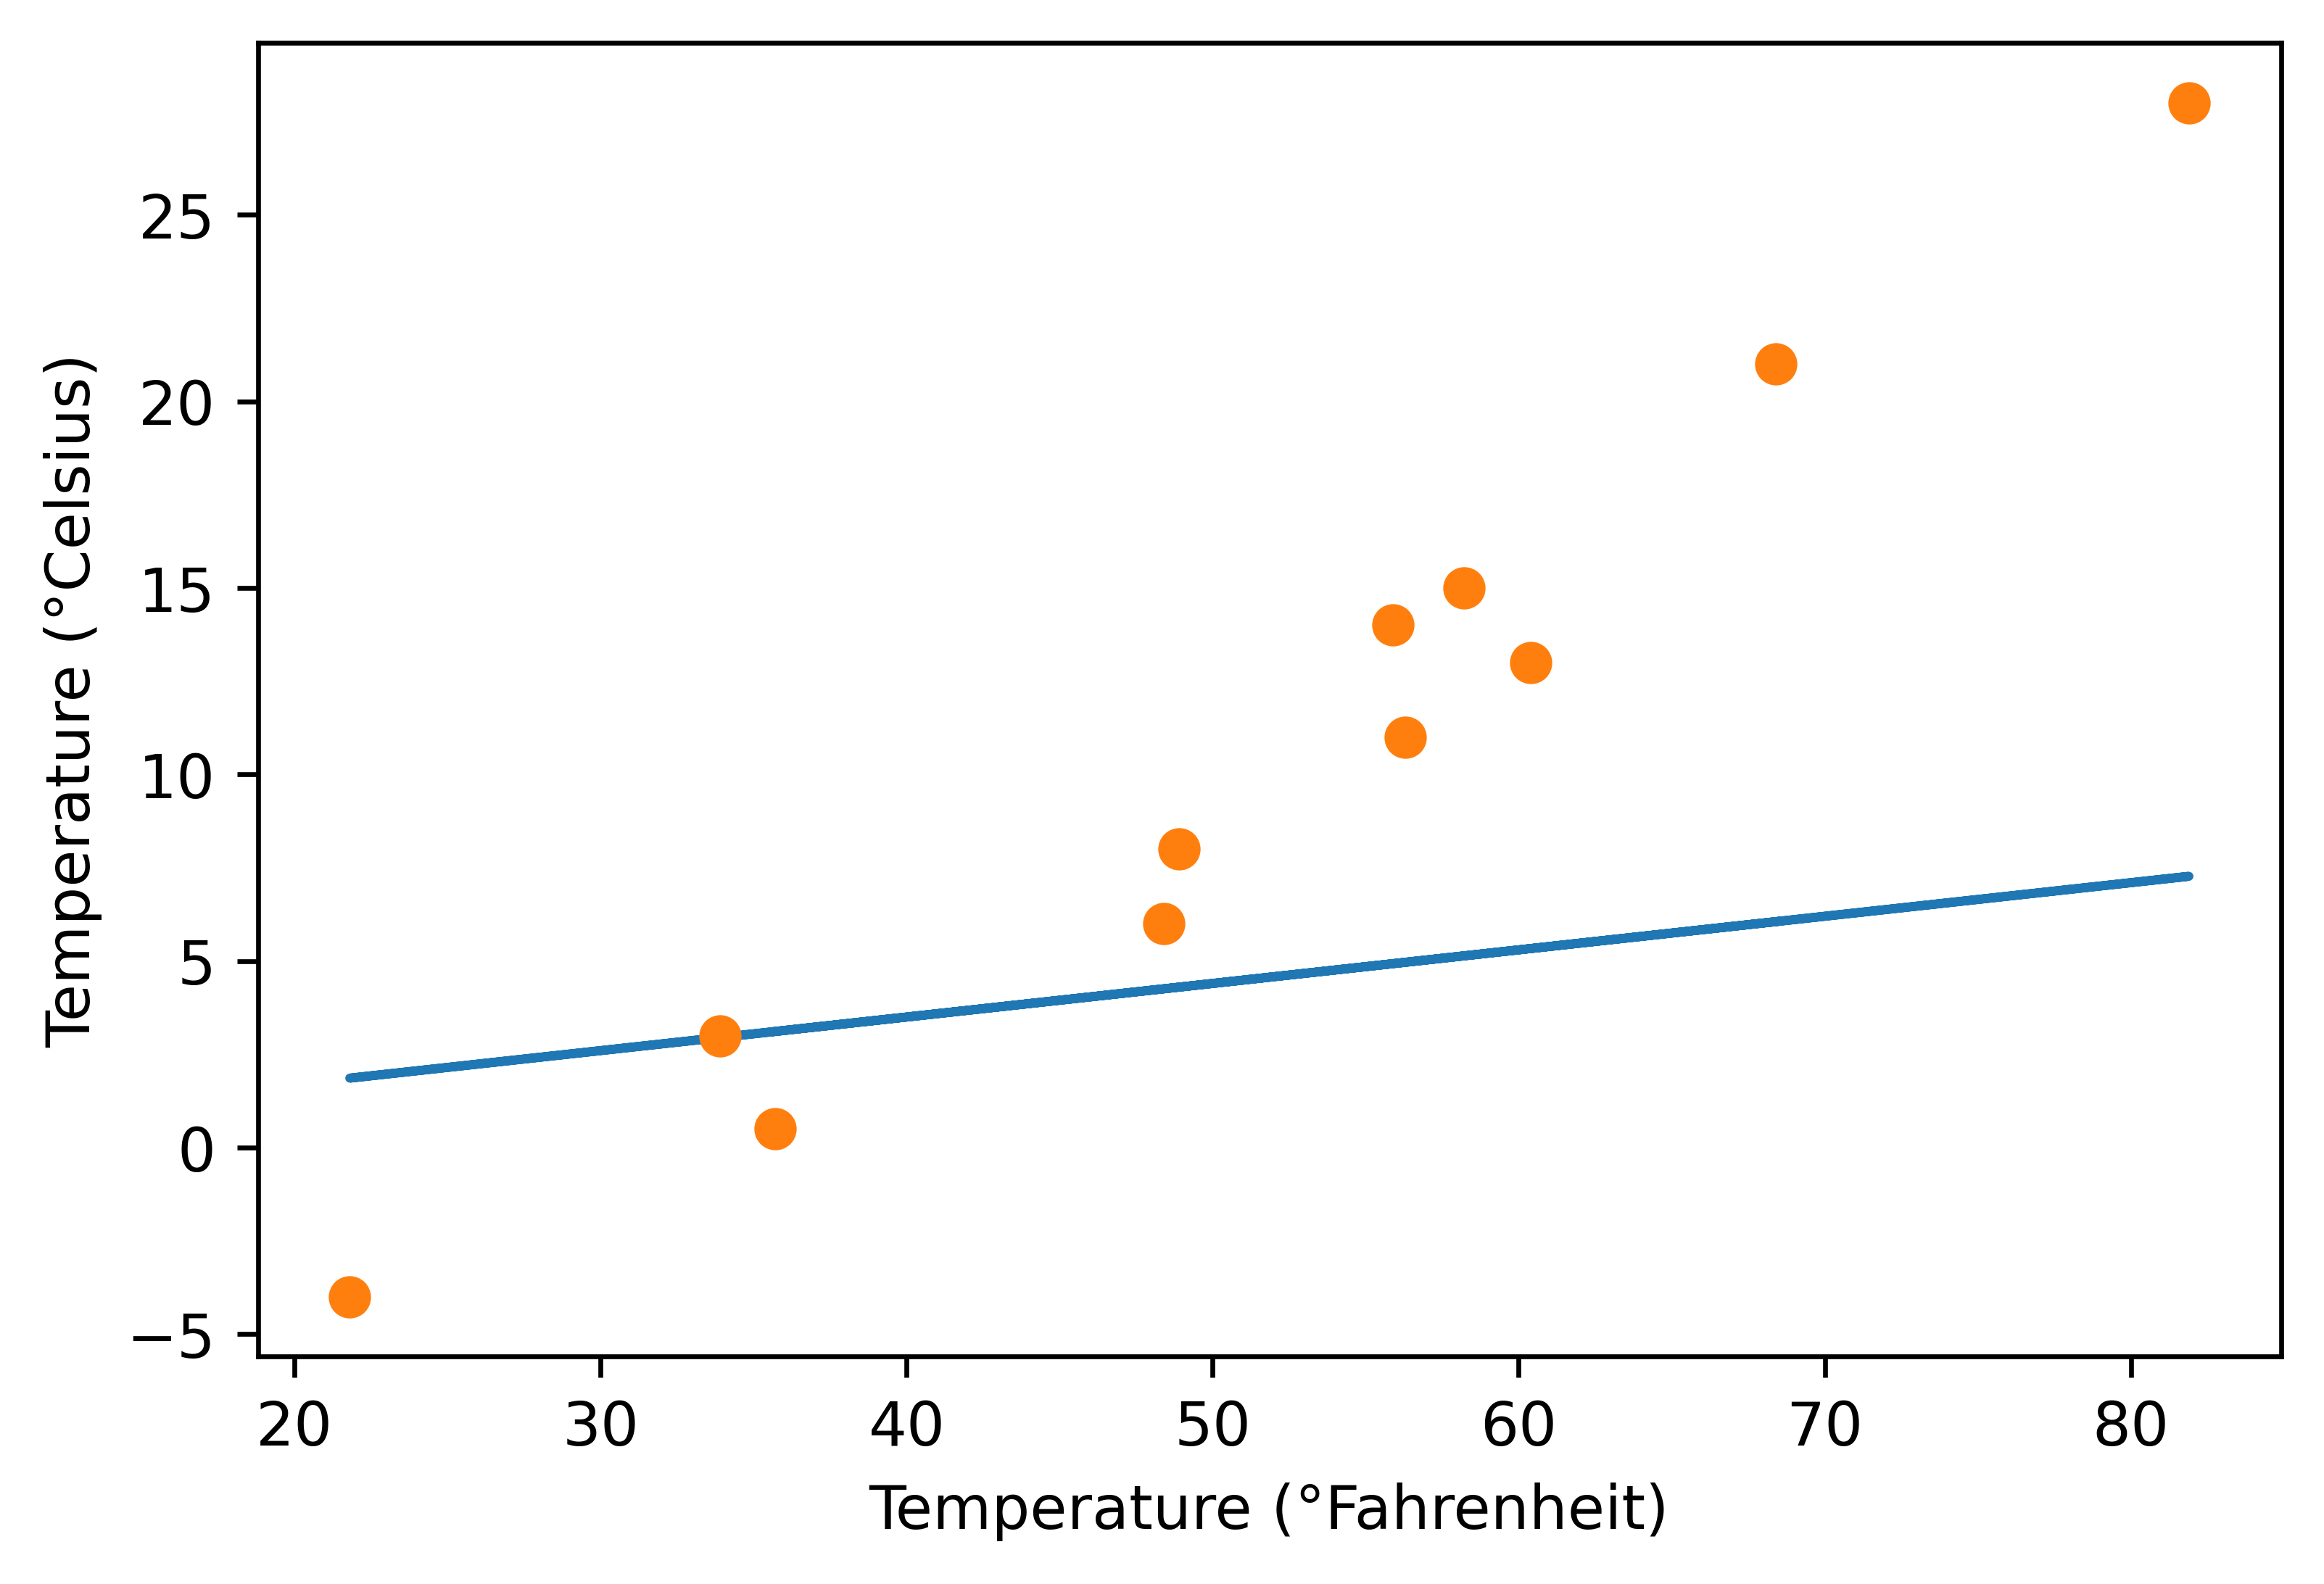

In [102]:
#Plotting the linear-fit model (solid line) versus input data (circles)
%matplotlib inline
from matplotlib import pyplot as plt

temp_p = my_model(temp_un, *params)  

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(temp_u.numpy(), temp_p.detach().numpy()) 
plt.plot(temp_u.numpy(), temp_c.numpy(), 'o')